In [1]:
# Importing all the necessary libraries and creating their aliases.
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import os # Enables me to download my charts

import seaborn as sns

sns.set()

import scipy.stats as stats 

import warnings
warnings.filterwarnings('ignore') # Helps to ignore warnings that may arise from version incompatibility

import shutil # To be able to save files as a zipped file

In [2]:
# Uploading the fifa 21 file and setting low memory to False to force Python to read all columns before deciding dtypes

df = pd.read_csv(r"C:\Users\amega\OneDrive\Dokumente\Personal\TechCrushBootCamp\fifa21_raw_data.csv\fifa21 raw data v2.csv", low_memory=False)

In [3]:
# Showing all columns

pd.set_option('display.max_columns', None)

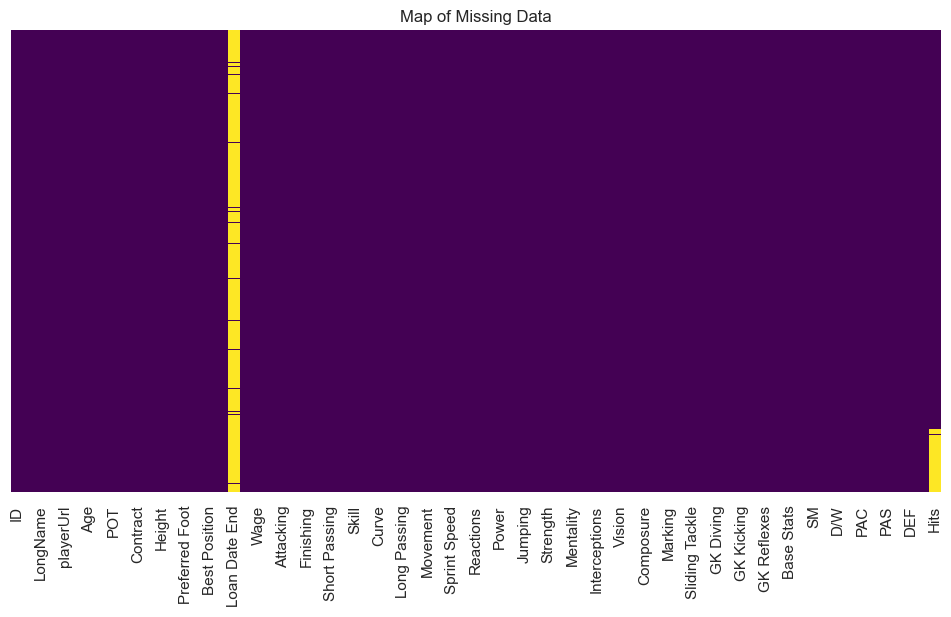

In [4]:
# Plotting the graph to see the missing data map before 'cleaning' the data begins

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Map of Missing Data")

plt.show()

> ### All the yellow lines represent missing data that needs to be handled.

In [5]:
# Creating a copy so we work with the copy

fifa_21 = df.copy()

In [6]:
fifa_21

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,"Jul 13, 2018",NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,51,CAM,"Aug 1, 2020",NaN,€130K,€500,€165K,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281

In [7]:
# Viewing 10 random rows to notice the 'dirt' in the dataset

fifa_21.sample(10)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
17759,255156,M. Muratovic,Mirza Muratovic,https://cdn.sofifa.com/players/255/156/21_60.png,http://sofifa.com/player/255156/mirza-muratovi...,Australia,20,55,67,\n\n\n\nBrisbane Roar,2019 ~ 2021,ST,175cm,75kg,Right,57,ST,"Dec 28, 2019",NaN,€300K,€800,€203K,241,41,56,55,44,45,236,54,51,40,39,52,330,72,74,65,47,72,300,54,69,64,63,50,222,42,22,55,42,61,55,74,26,26,22,46,11,8,10,8,9,1449,311,3 ★,2★,High,Medium,1 ★,73,54,42,55,28,59,NaN
3688,238637,S. Vasiliadis,Sebastian Vasiliadis,https://cdn.sofifa.com/players/238/637/21_60.png,http://sofifa.com/player/238637/sebastian-vasi...,Greece,22,72,78,\n\n\n\nSC Paderborn 07,2018 ~ 2021,"CM, CDM",175cm,75kg,Right,74,CAM,"Jul 1, 2018",NaN,€3.7M,€13K,€7.6M,281,59,59,46,75,42,317,73,45,56,68,75,381,74,71,78,73,85,349,68,66,85,68,62,324,68,63,70,74,49,73,201,66,72,63,59,12,7,14,14,12,1912,413,3 ★,3★,Medium,Medium,1 ★,72,61,68,75,65,72,20
10910,225561,M. Litka,Maurice Litka,https://cdn.sofifa.com/players/225/561/21_60.png,http://sofifa.com/player/225561/maurice-litka/...,Germany,24,64,70,\n\n\n\nFC Hansa Rostock,2020 ~ 2022,"LW, RW, CAM",180cm,67kg,Left,64,LW,"Aug 3, 2020",NaN,€925K,€1K,€1M,266,62,57,39,60,48,253,65,52,36,34,66,364,80,71,79,59,75,289,63,62,64,40,60,237,40,26,56,63,52,48,109,45,35,29,55,15,13,11,7,9,1573,339,4 ★,3★,High,Low,1 ★,75,58,56,67,36,47,7
3192,156713,A. Granqvist,Andreas Granqvist,https://cdn.sofifa.com/players/156/713/21_60.png,http://sofifa.com/player/156713/andreas-granqv...,Sweden,35,72,72,\n\n\n\nHelsingborgs IF,2018 ~ 2021,CB,192cm,84kg,Right,72,CB,"Jul 15, 2018",NaN,€625K,€2K,€1.2M,278,49,51,75,65,38,251,49,37,40,65,60,219,33,33,51,68,34,315,68,59,51,82,55,338,80,73,54,52,79,75,220,74,75,71,53,7,9,12,10,15,1674,346,3 ★,2★,Medium,High,2 ★,33,56,57,53,74,73,10
17189,245019,S. Woods,Sam Woods,https://cdn.sofifa.com/players/245/019/21_60.png,http://sofifa.com/player/245019/sam-woods/210006/,England,21,56,69,\n\n\n\nCrystal Palace,2017 ~ 2021,CB,186cm,77kg,Right,58,CB,"Jun 16, 2017",NaN,€325K,€5K,€404K,171,26,20,55,47,23,150,32,30,21,29,38,218,44,36,36,55,47,236,42,63,50,64,17,200,54,58,27,33,28,50,170,55,59,56,44,7,9,8,12,8,1189,251,2 ★,2★,Medium,Medium,1 ★,40,25,35,36,57,58,NaN
5488,237331,T. De Smet,Thibault De Smet,https://cdn.sofifa.com/players/237/331/21_60.png,http://sofifa.com/player/237331/thibault-de-sm...,Belgium,22,69,78,\n\n\n\nStade de Reims,2020 ~ 2024,"LB, LM, CB",182cm,68kg,Left,69,LB,"Jul 1, 2020",NaN,€3M,€9K,€3.3M,257,70,36,64,61,26,266,56,59,25,62,64,337,68,74,62,64,69,336,68,68,74,68,58,278,70,66,51,54,37,57,198,64,68,66,45,6,6,12,8,13,1717,374,3 ★,2★,Medium,Medium,1 ★,71,47,60,60,66,70,11
3042,183546,J. Hogg,Jonathan Hogg,https://cdn.sofifa.com/players/183/546/21_60.png,http://sofifa.com/player/183546/jonathan-hogg/...,England,31,73,73,\n\n\n\nHuddersfield Town,2013 ~ 2021,"CDM, CM",176cm,73kg,Right,73,CDM,"Jul 29, 2013",NaN,€2.1M,€21K,€5.7M,293,56,51,64,75,47,285,65,46,41,65,68,340,67,65,64,72,72,345,64,72,88,71,50,308,85,69,54,59,41,70,220,71,76,73,52,6,8,13,14,11,1843,399,3 ★,2★,Low,High,1 ★,66,53,63,67,72,78,9
8628,232768,T. Wada,Takuya Wada,https://cdn.sofifa.com/players/232/768/21_60.png,http://sofifa.com/player/232768/takuya-wada/21...,Japan,29,66,66,\n\n\n\nYokohama F. Marinos,2020 ~ 2021,"RB, LB",170cm,63kg,Left,66,RB,"Feb 1, 2020",NaN,€750K,€4K,€683K,261,76,31,5

In [8]:
# Checking the data types of each column

fifa_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [9]:
# Checking and filtering out which rows contain null values

nulls = fifa_21.isna().sum()
print(nulls[nulls>0])

Loan Date End    17966
Hits              2595
dtype: int64


In [10]:
# Renaming columns with short-form names to their actual names

# Strip whitespace from all column names
fifa_21.columns = fifa_21.columns.str.strip()
fifa_21.rename(columns={
    '↓OVA' : 'Overall_Rating',
    'POT' : 'Potential',
    'BOV' : 'Best_Overall',
    'W/F' : 'Weak_Foot',
    'SM' : 'Skill_Moves',
    'IR' : 'International_Reputation',
    'PAC' : 'Pace',
    'SHO' : 'Shooting',
    'PAS' : 'Passing',
    'DRI' : 'Dribbling',
    'DEF' : 'Defending',
    'PHY' : 'Physicality',
    'A/W' : 'Attacking_Work_Rate',
    'D/W' : 'Defending_Work_Rate'
}, inplace=True)

fifa_21.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,Overall_Rating,Potential,Club,Contract,Positions,Height,Weight,Preferred Foot,Best_Overall,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak_Foot,Skill_Moves,Attacking_Work_Rate,Defending_Work_Rate,International_Reputation,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [11]:
# This will show us if there are leading or trailing spaces

print([f"'{col}'" for col in fifa_21.columns])

["'ID'", "'Name'", "'LongName'", "'photoUrl'", "'playerUrl'", "'Nationality'", "'Age'", "'Overall_Rating'", "'Potential'", "'Club'", "'Contract'", "'Positions'", "'Height'", "'Weight'", "'Preferred Foot'", "'Best_Overall'", "'Best Position'", "'Joined'", "'Loan Date End'", "'Value'", "'Wage'", "'Release Clause'", "'Attacking'", "'Crossing'", "'Finishing'", "'Heading Accuracy'", "'Short Passing'", "'Volleys'", "'Skill'", "'Dribbling'", "'Curve'", "'FK Accuracy'", "'Long Passing'", "'Ball Control'", "'Movement'", "'Acceleration'", "'Sprint Speed'", "'Agility'", "'Reactions'", "'Balance'", "'Power'", "'Shot Power'", "'Jumping'", "'Stamina'", "'Strength'", "'Long Shots'", "'Mentality'", "'Aggression'", "'Interceptions'", "'Positioning'", "'Vision'", "'Penalties'", "'Composure'", "'Defending'", "'Marking'", "'Standing Tackle'", "'Sliding Tackle'", "'Goalkeeping'", "'GK Diving'", "'GK Handling'", "'GK Kicking'", "'GK Positioning'", "'GK Reflexes'", "'Total Stats'", "'Base Stats'", "'Weak_Foo

In [12]:
# Writing a function to delete the € from the value column and replacing the M with 1000000, and K with 1000

def transform_money(value):
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            value = value.replace('M', '')
            return int(float(value) * 1000000)
        elif 'K' in value:
            value = value.replace('K', '')
            return int(float(value) * 1000)
    return int(float(value))

In [13]:
# Applying the transform_money function to the 'Wage', 'Value' and 'Release Clause' columns

fifa_21['Value'] = fifa_21['Value'].apply(transform_money)
fifa_21['Wage'] = fifa_21['Wage'].apply(transform_money)
fifa_21['Release Clause'] = fifa_21['Release Clause'].apply(transform_money)

In [14]:
# Checking the transformation

fifa_21[['Value', 'Wage', 'Release Clause']].head(6)

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000
5,111000000,240000,132000000


In [15]:
# Check the data types of Height and Weight
print(fifa_21[['Height', 'Weight']].dtypes)

Height    object
Weight    object
dtype: object


In [16]:
# Also, we check a sample to see if the 'cm' or 'kg' letters are still there
print(fifa_21[['Height', 'Weight']].sample(5))

      Height Weight
3604   190cm   83kg
2568   188cm   73kg
17421  187cm   73kg
2030   178cm   80kg
1653   187cm   76kg


In [17]:
# To make sure our heights are all converted to centimetres, we write a function to check and convert if any is found

def convert_height(height):
    if 'cm' in str(height):
        return int(height.replace('cm', ''))
    elif "'" in str(height):
        # splitting 6'2" into ['6', '2']
        feet, inches = height.split("'")
        # stripping the " from inches
        inches = inches.replace('"', '')
        # calculating: (feet * 30.48) + (inches * 2.54)
        total_cm = (int(feet) * 30.48) + (int(inches) * 2.54)
        return int(total_cm)
    else:
        return int(height)

In [18]:
# Applying the function on Height column

fifa_21['Height'] = fifa_21['Height'].apply(convert_height)

In [19]:
fifa_21['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [20]:
# To make sure our weights are all converted to centimetres, we write a function to check and convert if any is found

def convert_weight(weight):
    if 'kg' in str(weight):
        return int(weight.replace('kg', ''))
    elif "lbs" in str(weight):
        # Remove 'lbs', convert to float, and multiply by 0.4536
        pounds = float(weight.replace('lbs', ''))
        return int(pounds * 0.4536)
    else:
        # If it's already a number or a different format
        return int(float(weight))

In [21]:
# Applying the function on Height column

fifa_21['Weight'] = fifa_21['Weight'].apply(convert_weight)

In [22]:
# Checking 10 samples to see if the function effected the changes

print(fifa_21[['Height', 'Weight']].sample(10))

       Height  Weight
10417     188      75
4542      184      73
7826      194      90
14226     173      65
887       162      63
9595      184      80
4701      173      65
8901      189      74
9283      175      76
14144     184      71


In [25]:
# Stripping newlines and extra spaces from the Club column
fifa_21['Club'] = fifa_21['Club'].str.strip()

In [26]:
# Fixing columns that have a ★ symbol inside the number.

# Listing the columns that contain the star symbol
star_columns = ['Weak_Foot', 'Skill_Moves', 'International_Reputation']

# Looping through each column and stripping off the stars and converting to integers
for col in star_columns:
    # We add .astype(str) to convert it to a string to be sure before replacing the star
    fifa_21[col] = fifa_21[col].astype(str).str.replace('★', '')
    # Now converting it to an integer
    fifa_21[col] = fifa_21[col].astype(int)

In [27]:
print(fifa_21[star_columns].dtypes)

Weak_Foot                   int64
Skill_Moves                 int64
International_Reputation    int64
dtype: object


In [28]:
# Working on the 'Hits' column to clean the NaN, the 'K', and convert to integer

# Defining the function
# Handling null values first
def clean_hits(x):
    if pd.isna(x):
        return 0
    # Converting to string to handle the 'K'
    x = str(x)
    # Handling the 'K' as thousands
    if 'K' in x:
        x = x.replace('K', '')
        return int(float(x) * 1000)
    else:
        return int(float(x))

In [29]:
# Applying the function to the hits column

fifa_21['Hits'] = fifa_21['Hits'].apply(clean_hits)

In [30]:
# Verifying the results

print(fifa_21['Hits'].dtype)
print(fifa_21['Hits'].head(5))

int64
0    771
1    562
2    150
3    207
4    595
Name: Hits, dtype: int64


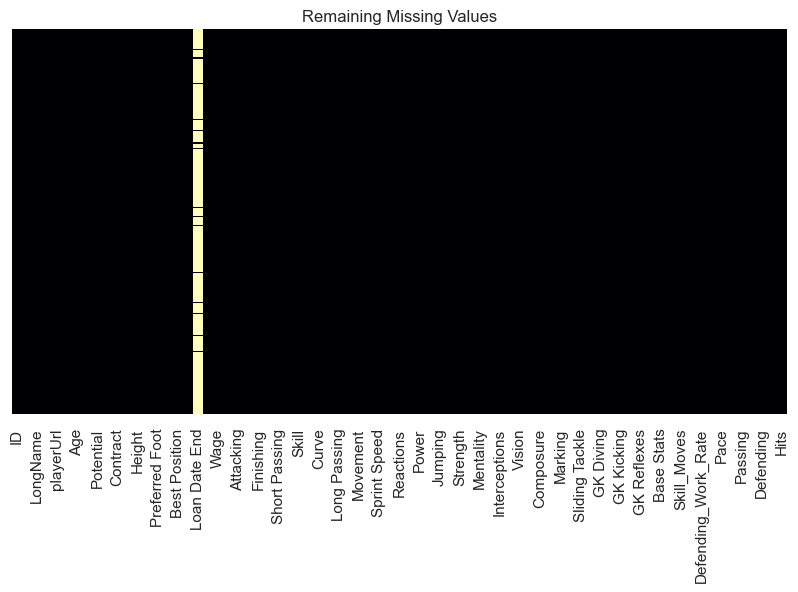

In [31]:
# Last visual check to see how changed the data has become after cleaning

plt.figure(figsize=(10, 5))
sns.heatmap(fifa_21.isna(), yticklabels=False, cbar=False, cmap='magma')
plt.title('Remaining Missing Values')

plt.show()

> ### The only major uncleaned data left is the loan date end column. Doing a *categorical imputation* on this column to have a clean data set. The yellow line do not show errors in that column, but as a result of a player not being on loan.

In [32]:
# Filling all NaN values in the 'Loan Date End' column with 'Not On Loan'

fifa_21['Loan Date End'] = fifa_21['Loan Date End'].fillna('Not on Loan')

In [33]:
# Checking the 'Club' column to be sure players without a club is filled
fifa_21['Club'] = fifa_21['Club'].fillna('Free Agent')

In [34]:
# The final check to make sure there are zero null values in the entire dataset

print(f'All columns put together give {fifa_21.isna().sum().sum()} null values') # This adds up all the columns when there are no NaN and gives the total

All columns put together give 0 null values


In [36]:
# Converting the 'Joined' column dtype to datetime dtype

fifa_21['Joined'] = pd.to_datetime(fifa_21['Joined'])

In [37]:
# Converting the 'Loan Date End' column dtype to datetime dtype and Changing
# those columns with 'Not on Loan' to NaT(Not a Time)

fifa_21['Loan Date End'] = pd.to_datetime(fifa_21['Loan Date End'], errors='coerce')

In [38]:
# Checking the dtypes

print(fifa_21[['Joined', 'Loan Date End']].dtypes)

Joined           datetime64[ns]
Loan Date End    datetime64[ns]
dtype: object


### **<center> "Stories" To Tell With fifa21 Cleaned Data</center>**

### > Telling The Money Story (Rating vs. Wage)
* This answers the "Big Question": Does talent (Rating) actually equal money (Wage)?

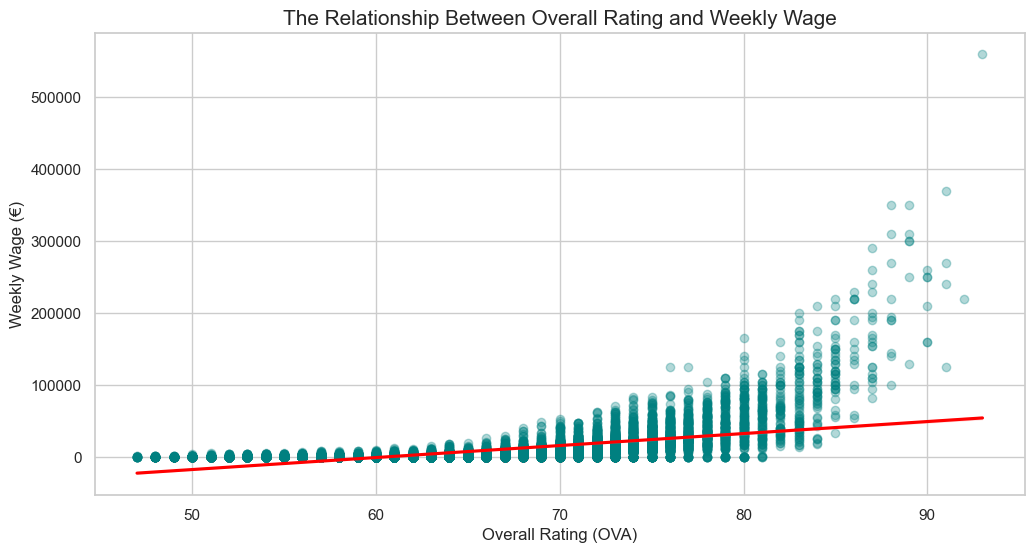

In [39]:
# Set the style for a professional look
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Create the scatter plot with a regression line
sns.regplot(data=fifa_21, x='Overall_Rating', y='Wage', 
            scatter_kws={'alpha':0.3, 'color':'teal'}, 
            line_kws={'color':'red'})

plt.title('The Relationship Between Overall Rating and Weekly Wage', fontsize=15)
plt.xlabel('Overall Rating (OVA)', fontsize=12)
plt.ylabel('Weekly Wage (€)', fontsize=12)

plt.show()

### **Observations & Insights From Our Scatter Plot With Regression Line**
1. The "Elite" Premium (Exponential Growth)
Notice how the data points stay very close to the bottom (near zero) for most players rated between 45 and 75. However, once a player hits 80+, the wages don't just go up—they skyrocket.

> *Insight:* Football clubs pay a massive "talent premium." The difference in wages between a 70-rated and 80-rated player is small, but the difference between an 80-rated and 90-rated player is astronomical.

2. The "Regression Line" Gap
The red line is the Linear Regression line. It tries to predict wages based on ratings.

> *Insight:* You can see that almost all "Top Tier" players (rated 85+) are above the red line. This tells us that a simple linear model actually underestimates how much superstars earn. Their value is non-linear.

3. The Outliers (The Superstars)
That single dot way at the top right (earning over €500,000) is likely Lionel Messi.

> *Insight:* This shows that the dataset contains "Outliers", individuals so unique that they break the general trend of the rest of the data.

4. Overpaid vs. Underpaid
- *Top Left of the Cluster:* Players who have lower ratings but earn high wages (potentially overpaid or ageing stars on big contracts).
- *Bottom right of the cluster:* Players who have high ratings but relatively low wages, potentially including young "wonderkids" or bargains.

### > The Physicality Story: Does Height Affect Heading Accuracy?

<Figure size 1000x1000 with 0 Axes>

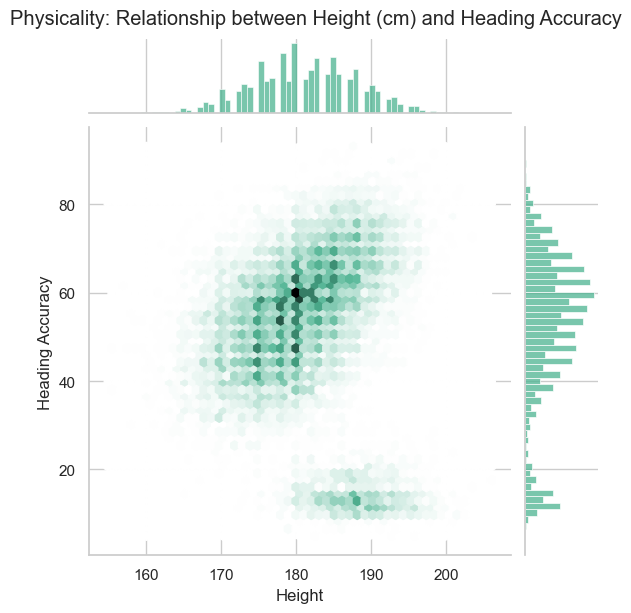

In [40]:
plt.figure(figsize=(10, 10))

# Using 'kind="hex"' to handle the overlap of 18,000 players 
# Hexagons show density (darker = more players)
g = sns.jointplot(data=fifa_21, x='Height', y='Heading Accuracy', 
                  kind='hex', color='#4CB391')

g.fig.suptitle('Physicality: Relationship between Height (cm) and Heading Accuracy', y=1.02)

plt.show()

### **Observations & Insights From the Hexbin Jointplot**
1. The Middle Cluster: The darkest hexagon (the "black" spot) is right around 180cm of height and 60 Heading Accuracy. This is the "average" FIFA player profile.

2. The Vertical Split: Take a note of the separate, smaller cluster at the very bottom (Heading Accuracy < 20).
> *My Insight:* These are the Goalkeepers. From the chart, goalkeepers are often tall, but their heading stats are near zero.

3. There is a positive correlation because, generally, the "cloud" of hexagons slopes upward to the right. This confirms that while short players can have good heading, there is a clear statistical advantage to being taller.

### > **Potential vs. Age.**
* This answers the question: "When is the best time to buy a player?"

In [41]:
# Calculating the average Overall and Potential by Age

age_stats = fifa_21.groupby('Age')[['Overall_Rating', 'Potential']].mean().reset_index()
age_stats

,Age,Overall_Rating,Potential
0,16,54.828571,75.285714
1,17,56.370242,74.847751
2,18,57.354376,73.826399
3,19,58.388476,72.857807
4,20,61.483665,73.025568
5,21,62.543809,72.869660
6,22,64.415904,73.010556
7,23,65.333788,72.386348
8,24,67.053997,72.019635
9,25,67.286521,70.991929


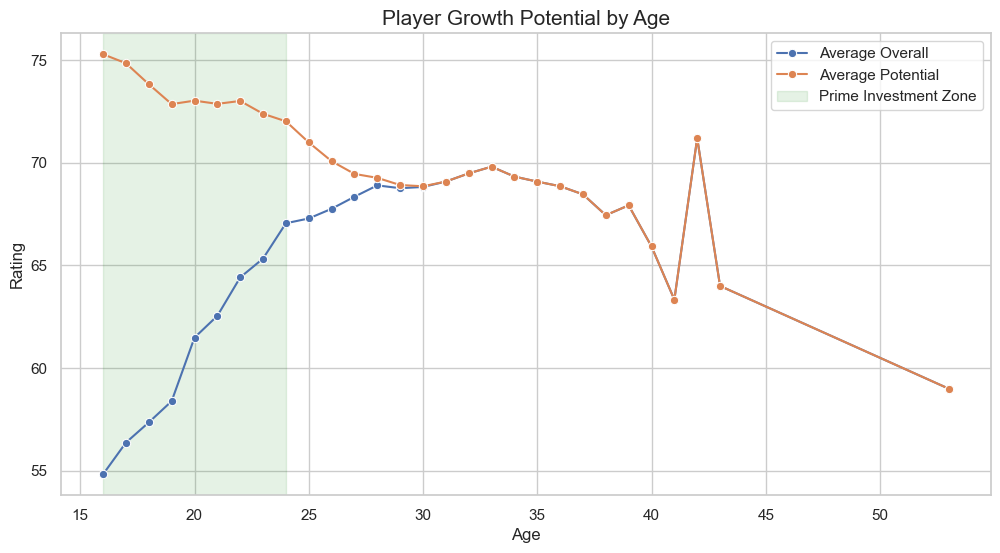

In [42]:
# Plotting the lineplot

plt.figure(figsize=(12, 6))

# Plotting both lines
sns.lineplot(data=age_stats, x='Age', y='Overall_Rating', label='Average Overall', marker='o')
sns.lineplot(data=age_stats, x='Age', y='Potential', label='Average Potential', marker='o')

# Highlighting the "Investment Window"
plt.axvspan(16, 24, color='green', alpha=0.1, label='Prime Investment Zone')

plt.title('Player Growth Potential by Age', fontsize=15)
plt.ylabel('Rating', fontsize=12)
plt.legend()
plt.show()

### **This plot is the "Gold Mine" for a Football Manager or a sports scout.**
It perfectly illustrates the lifecycle of a professional athlete's value.

1. The "Growth Gap"
Looking at the space between the orange line (Potential) and the blue line (Current Overall) in that shaded green area.
> *Insight:* Between the ages of 16 and 24, the gap is at its widest. This represents the "room for improvement." This is the best time to invest. This tells us that a player is being bought based on their current low cost (blue line) while knowing they have the biological and technical capacity to reach the orange line.

2. The Convergence Point (The Peak)
You will notice how the lines meet around age 28-30.
> *Insight:* At this stage, a player’s "Potential" and "Overall Rating" become the same. This means the player has "arrived." They are no longer a project; they are a finished product. This is usually when a player is at their most expensive in the transfer market because they are performing at their absolute maximum.

3. The "Sunset" Phase (Post-33)
After age 33, both lines start to trend downward together. There is no longer a gap between the lines. This means that physical decline has set in. In the FIFA dataset, once a player hits this age, their "Potential" is usually locked to their "Current Rating" as it slowly drops.

4. The "Late-Career" Spike (The Outliers)
You might notice a weird jump in the orange line around age 42. This is likely caused by a very small number of players (like legendary goalkeepers) who are still in the game at that age.

### **The Loyalty Story: Years at Club vs. Rating**

In [43]:
# Extracting the date at the club from the 'Joined' column

fifa_21['Years_at_Club'] = 2021 - fifa_21['Joined'].dt.year

In [44]:
# Checking the top loyalists

print(fifa_21[['Name', 'Club', 'Years_at_Club']].sort_values(by='Years_at_Club', ascending=False).head())

                Name                Club  Years_at_Club
10264    H. Sogahata     Kashima Antlers             23
9948    D. Lewington  Milton Keynes Dons             19
501      I. Akinfeev     PFC CSKA Moscow             19
4770   Kim Kwang Suk     Pohang Steelers             19
11704       H. Otani      Kashiwa Reysol             18


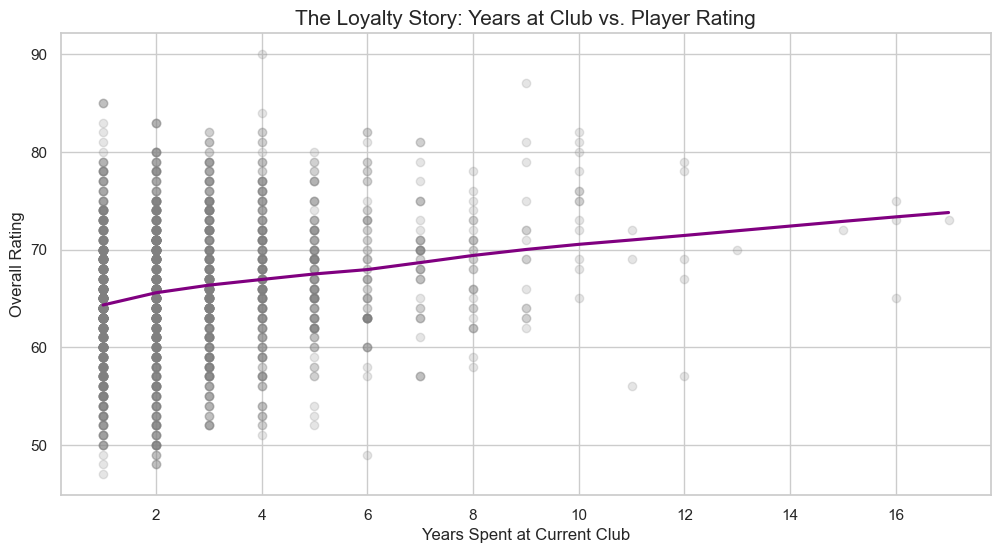

In [45]:
# Plotting the regression chart
plt.figure(figsize=(12, 6))

# Using a sample of the data (e.g., 2000 players) makes the trend line easier to see
sns.regplot(data=fifa_21.sample(2000), x='Years_at_Club', y='Overall_Rating', 
            lowess=True, 
            scatter_kws={'alpha':0.2, 'color':'gray'}, 
            line_kws={'color':'purple'})

plt.title('The Loyalty Story: Years at Club vs. Player Rating', fontsize=15)
plt.xlabel('Years Spent at Current Club', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)

plt.show()

### **Observation & Insight**
"The Loyalty Story" chart explores the relationship between a player's tenure at a single club and their performance level.

Based on the regression line and the distribution of those 2,000 sampled players, here is the breakdown of what this is saying:

1. The "Survival of the Fittest" Trend
Clearly, the purple trend line starts around a 64 rating for new signings and steadily climbs toward 72+ for long-term players.

> *The Insight:* This suggests that players who stay at a club for 10+ years are generally higher-rated.

> *The Reality:* It's a "selection bias." Clubs don't keep low-rated players for a decade. Only the high performers earn the right to stay, which is why the average rating increases as the years go by.

2. The Transfer "Noise" (Years 0–5)
Observe how thick and dense the dots are on the left side of the chart.

> *The Insight:* Most players in the modern game move clubs every 1 to 4 years. In this "High-Density Zone," ratings vary wildly—from 48 to 90+.

> *The Conclusion:* Short-term tenure is common across all talent levels, but long-term loyalty is reserved for the elite or highly consistent.

3. The "Legend" Plateau
After about 7.5 years, the purple line starts to flatten out.

> *The Insight:* By the time a player has been at a club for a decade, they have usually hit their peak. They aren't getting much better, but they provide a high, stable level of performance.

### > **The "Left-Foot" Advantage**
In real football, left-footed players are often considered "special" or more creative. Let's answer the question; "Do left-footed players actually have higher average ratings or potential than right-footed ones?"

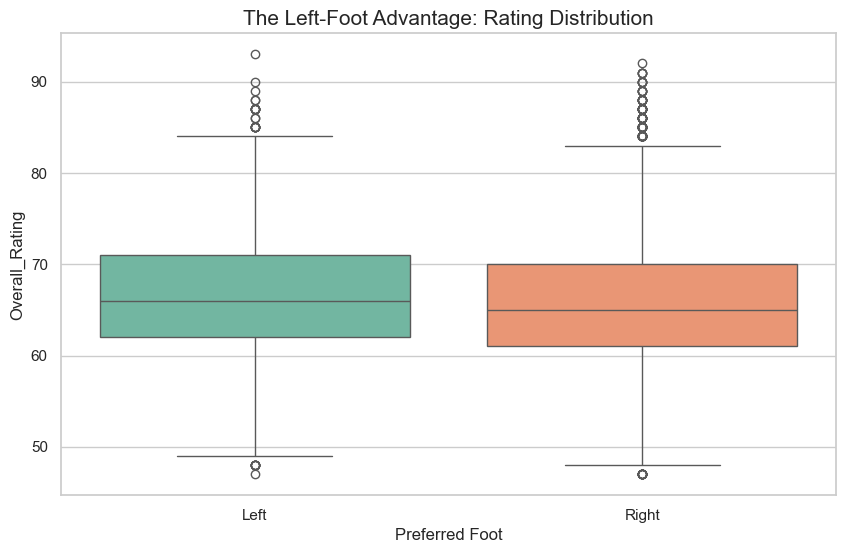

In [46]:
# The "Left-Foot" Advantage (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=fifa_21, x='Preferred Foot', y='Overall_Rating', palette='Set2')
plt.title('The Left-Foot Advantage: Rating Distribution', fontsize=15)
plt.show()

### **Analysis & Insights**
That boxplot reveals a subtle but fascinating statistical truth about the FIFA 21 dataset.

* What the "Left-Foot Advantage" Chart Says:
Higher Median Quality: If you look at the middle line inside the boxes (the median), the left-footed players have a slightly higher median rating than right-footed players.

* A "Higher Floor": The entire "box" for left-footed players (which represents the middle 50% of players) is shifted slightly upward compared to right-footed players.

**The Insight:** This suggests that while there are far more right-footed players in the game, the left-footed ones are—on average—of a slightly higher technical quality. In football scouting, "lefties" are often considered specialised talent, and the data confirms that they hold a marginal statistical edge in overall rating.

### > **The League of Stars**
We want to see which organisations(Clubs) focus on buying established global brands (International_Reputation).

In [47]:
# Calculate average reputation per club and take the top 10
top_reputation_clubs = fifa_21.groupby('Club')['International_Reputation'].mean().sort_values(ascending=False).head(10)
top_reputation_clubs

Club
FC Bayern München      2.478261
Paris Saint-Germain    2.200000
Real Madrid            2.200000
Juventus               2.178571
Inter                  2.076923
FC Barcelona           2.000000
Manchester United      1.939394
Napoli                 1.923077
Chelsea                1.909091
Liverpool              1.909091
Name: International_Reputation, dtype: float64

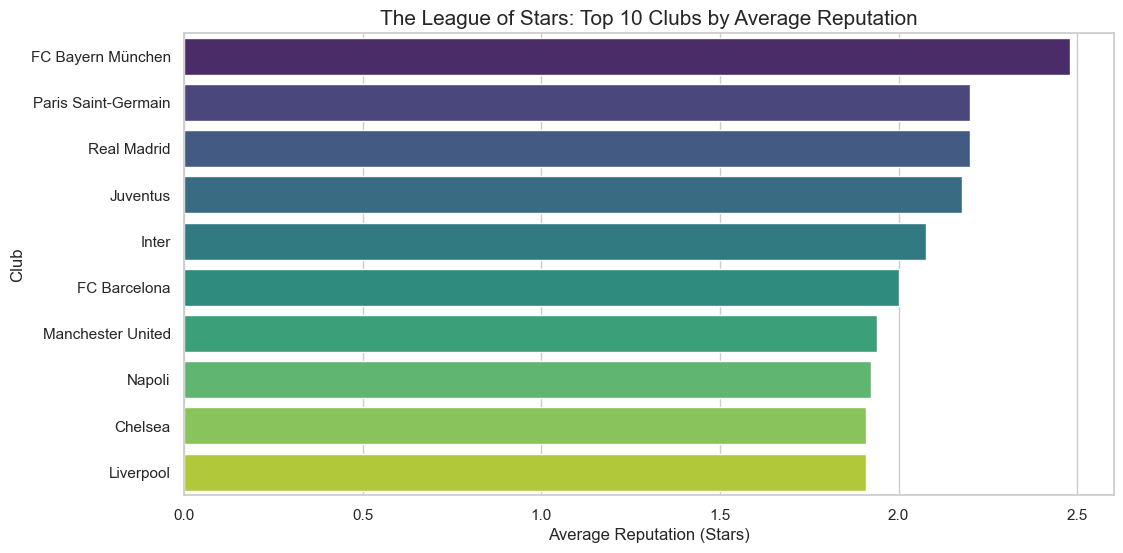

In [48]:
# Plotting the bar chart

plt.figure(figsize=(12, 6))
sns.barplot(x=top_reputation_clubs.values, y=top_reputation_clubs.index, palette='viridis')
plt.title('The League of Stars: Top 10 Clubs by Average Reputation', fontsize=15)
plt.xlabel('Average Reputation (Stars)')
plt.show()

### **My Insights**

1. The International Reputation metric serves as a proxy for global brand power rather than just raw on-field performance. By ranking the top ten clubs by their average star rating, the "Heavyweights" of global football are identified. FC Bayern München stands out as the definitive leader, maintaining an average reputation nearing 2.5 stars, while Paris Saint-Germain and Real Madrid follow closely. These clubs represent the "Galactico" model, where the recruitment strategy prioritises players who are not only talented but also possess significant marketability and prestige on the world stage.

2. By using an average rather than a total count, the data highlights the density of elite talent within a squad. This reveals a high level of organisational quality, as seen in clubs like Bayern, where the entire roster, rather than just a few "poster boys", consists of internationally recognised names. Even the clubs at the lower end of this top-ten list, such as Liverpool, remain within the elite 1% of global football organisations, showcasing a rare consistency in maintaining high-profile squads that few other teams can match.

3. Finally, the data exposes a clear "Prestige Gap" and a tiered hierarchy among the world's elite. There is a sharp decline in average reputation after the top four clubs—Bayern, PSG, Real Madrid, and Juventus, who form Tier 1 (Elite Brands), focused on "finished product" superstars. Below them, Tier 2 (Global Contenders) like Barcelona and Manchester United show a more mixed squad profile, combining established legends with emerging prospects who have yet to achieve peak global fame, illustrating the different ways top-flight clubs balance current branding with future potential.

### > **The Value vs. Release Clause" Story**
This is a brilliant business insight because it will show us how much extra "protection money" clubs put on their players to prevent other clubs from "stealing" their players.

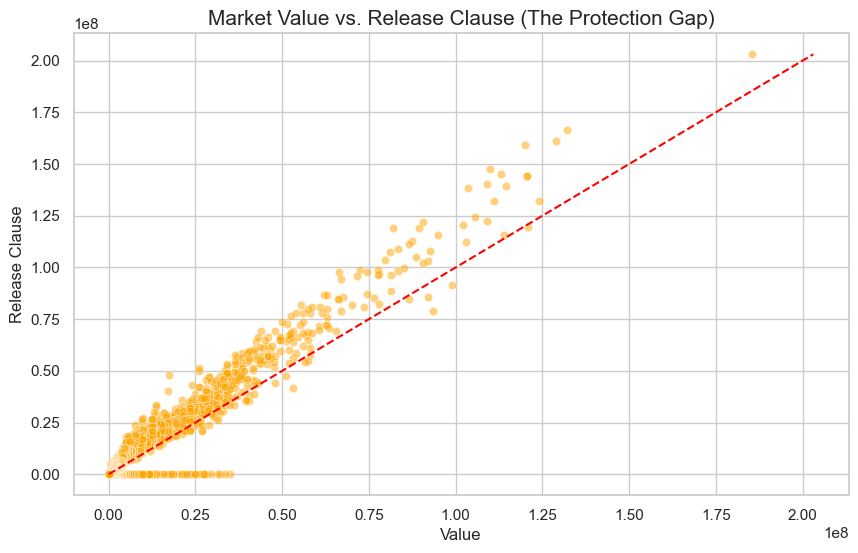

In [49]:
plt.figure(figsize=(10, 6))

# Plotting Value vs Release Clause on a scatterplot
sns.scatterplot(data=fifa_21, x='Value', y='Release Clause', alpha=0.5, color='orange')

# Adding a 45-degree line to show where Value = Release Clause
max_val = max(fifa_21['Value'].max(), fifa_21['Release Clause'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.title('Market Value vs. Release Clause (The Protection Gap)', fontsize=15)
plt.show()

### **My Insights**

1. The "Safety Buffer" identified in the scatterplot highlights the defensive financial strategies employed by football clubs. By plotting market value against release clauses, the data shows that nearly all players sit well above the equilibrium line where value would equal the buyout cost. This gap acts as a strategic deterrent; by intentionally setting release clauses 20% to 50% higher than a player's actual worth, clubs force rival teams into a "loyalty tax," ensuring they cannot bypass negotiations without paying a significant premium for the right to "steal" the player.

2. As we look toward the top-right of the distribution, we observe the "Superstar Premium," where the disparity between value and release clauses becomes extreme. For elite players valued over €100M, the release clauses do not merely scale linearly; they skyrocket into astronomical figures. This trend serves as a risk-mitigation tool for clubs holding high-value assets; the more irreplaceable a player is, the more aggressively a club uses a "lock-out" clause to prevent any team from triggering a transfer without a world-record financial commitment.

3. Conversely, the data reveals a significant number of "Unprotected Outliers" residing at the very bottom of the chart. These players possess a positive market value but have a release clause of zero, indicating their contracts lack a buy-out provision entirely. This is often a reflection of regional league regulations, such as in the English Premier League, where release clauses are not mandatory. For the club, this represents the ultimate position of power, as it grants them total control over the transfer process, forcing any interested buyer to meet the club’s specific asking price in a direct negotiation.

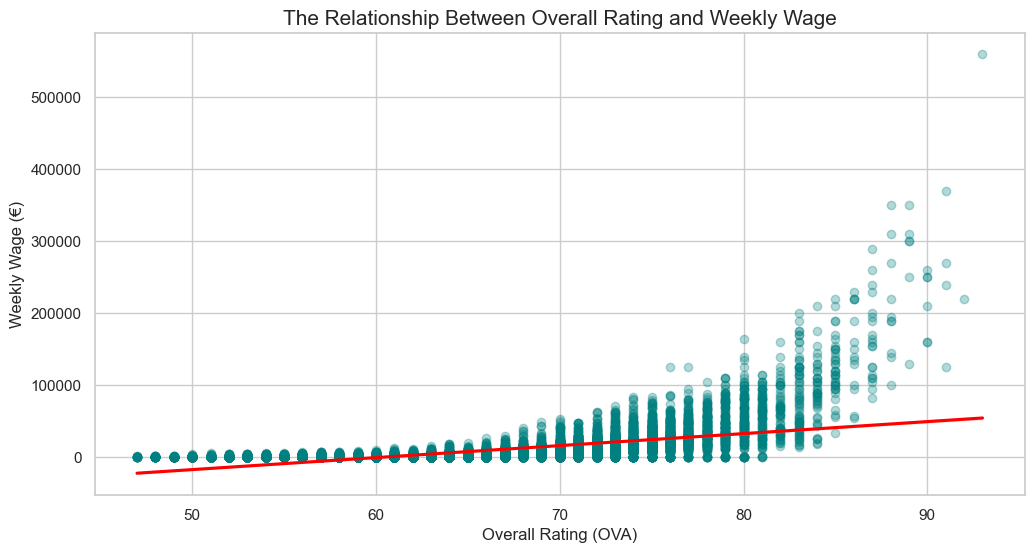

<Figure size 1000x1000 with 0 Axes>

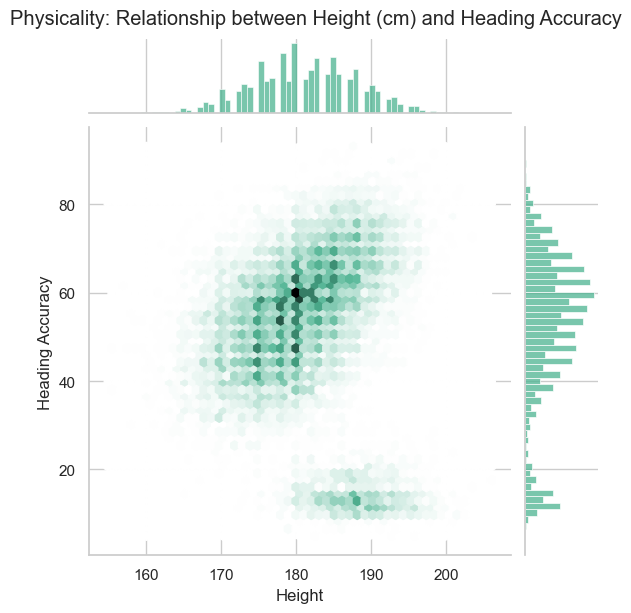

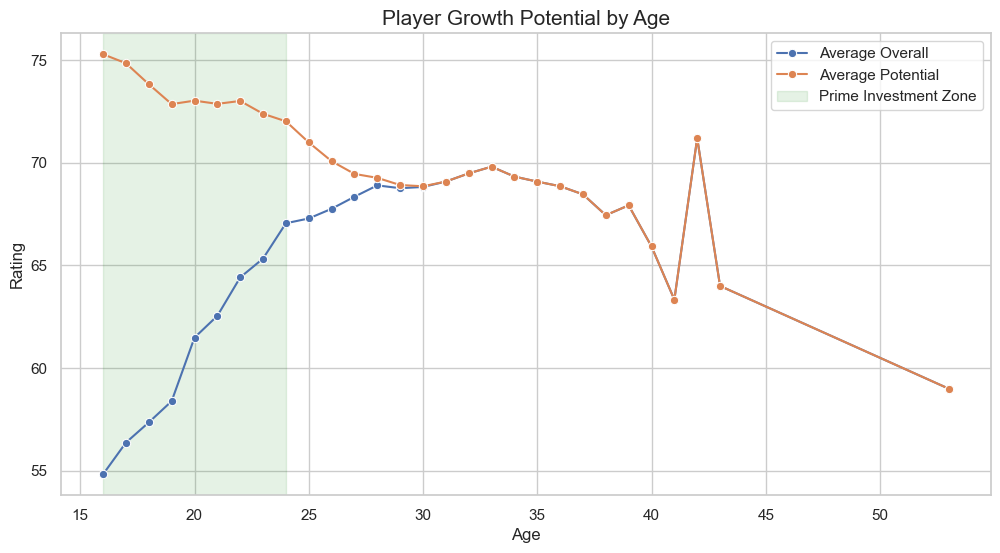

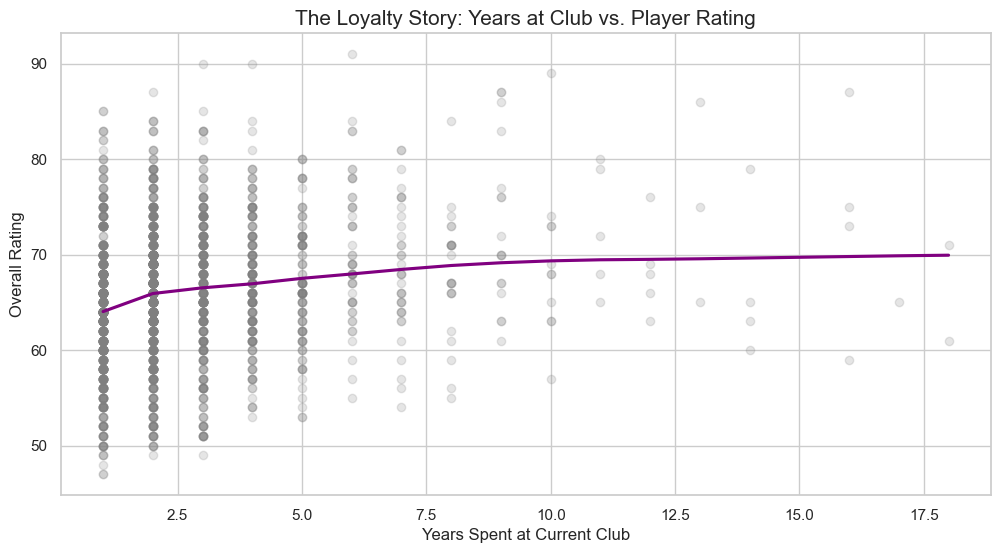

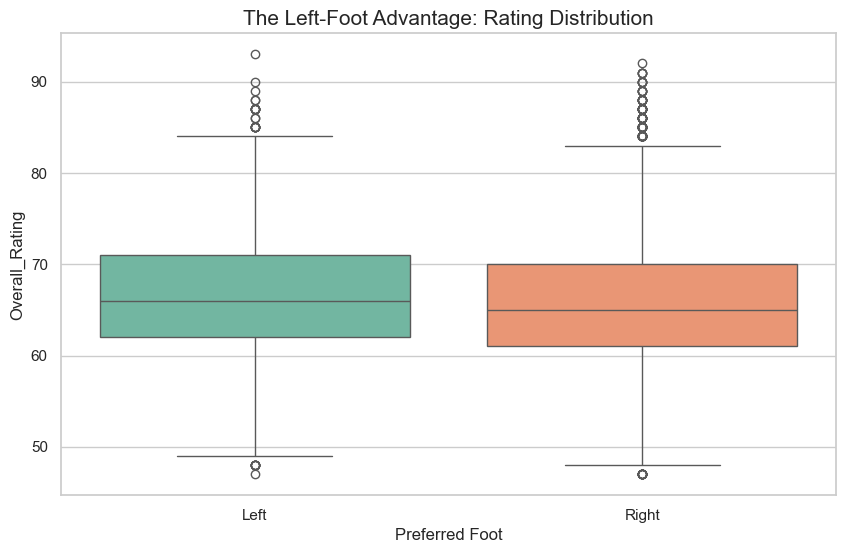

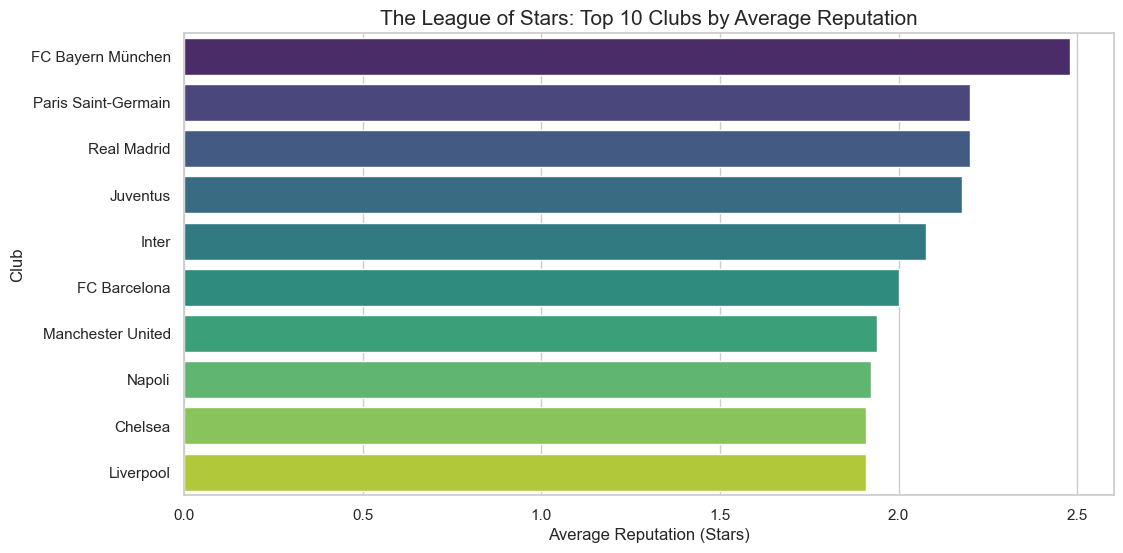

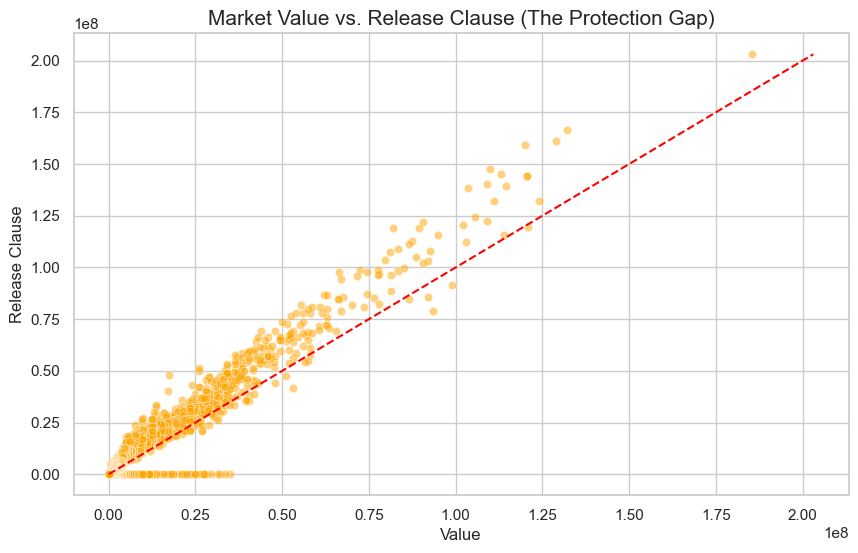

In [50]:
# Create the folder if it doesn't exist
folder_name = 'Visualizations'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully!")

# 1. The Money Story
# Set the style for a professional look
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Create the scatter plot with a regression line
sns.regplot(data=fifa_21, x='Overall_Rating', y='Wage', 
            scatter_kws={'alpha':0.3, 'color':'teal'}, 
            line_kws={'color':'red'})

plt.title('The Relationship Between Overall Rating and Weekly Wage', fontsize=15)
plt.xlabel('Overall Rating (OVA)', fontsize=12)
plt.ylabel('Weekly Wage (€)', fontsize=12)
plt.savefig(f'{folder_name}/money_story.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Physicality
plt.figure(figsize=(10, 10))

# Using 'kind="hex"' to handle the overlap of 18,000 players 
# Hexagons show density (darker = more players)
g = sns.jointplot(data=fifa_21, x='Height', y='Heading Accuracy', 
                  kind='hex', color='#4CB391')

g.fig.suptitle('Physicality: Relationship between Height (cm) and Heading Accuracy', y=1.02)
plt.savefig(f'{folder_name}/physicality_story.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. The Potential vs. Age Story
# Plotting the lineplot

plt.figure(figsize=(12, 6))

# Plotting both lines
sns.lineplot(data=age_stats, x='Age', y='Overall_Rating', label='Average Overall', marker='o')
sns.lineplot(data=age_stats, x='Age', y='Potential', label='Average Potential', marker='o')

# Highlighting the "Investment Window"
plt.axvspan(16, 24, color='green', alpha=0.1, label='Prime Investment Zone')

plt.title('Player Growth Potential by Age', fontsize=15)
plt.ylabel('Rating', fontsize=12)
plt.legend()
plt.savefig(f'{folder_name}/potential_and_age_story.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. The Loyalty story
# Plotting the regression chart
plt.figure(figsize=(12, 6))

# Using a sample of the data (e.g., 2000 players) makes the trend line easier to see
sns.regplot(data=fifa_21.sample(2000), x='Years_at_Club', y='Overall_Rating', 
            lowess=True, 
            scatter_kws={'alpha':0.2, 'color':'gray'}, 
            line_kws={'color':'purple'})

plt.title('The Loyalty Story: Years at Club vs. Player Rating', fontsize=15)
plt.xlabel('Years Spent at Current Club', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.savefig(f'{folder_name}/loyalty_story.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. the left footed advantage story
# The "Left-Foot" Advantage (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=fifa_21, x='Preferred Foot', y='Overall_Rating', palette='Set2')
plt.title('The Left-Foot Advantage: Rating Distribution', fontsize=15)
plt.savefig(f'{folder_name}/left_footed_story.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. The league of stars story
# Plotting the bar chart

plt.figure(figsize=(12, 6))
sns.barplot(x=top_reputation_clubs.values, y=top_reputation_clubs.index, palette='viridis')
plt.title('The League of Stars: Top 10 Clubs by Average Reputation', fontsize=15)
plt.xlabel('Average Reputation (Stars)')
plt.savefig(f'{folder_name}/league_of_stars_story.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. The value vrs release clause
plt.figure(figsize=(10, 6))

# Plotting Value vs Release Clause on a scatterplot
sns.scatterplot(data=fifa_21, x='Value', y='Release Clause', alpha=0.5, color='orange')

# Adding a 45-degree line to show where Value = Release Clause
max_val = max(fifa_21['Value'].max(), fifa_21['Release Clause'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.title('Market Value vs. Release Clause (The Protection Gap)', fontsize=15)
plt.savefig(f'{folder_name}/value_and_release_clause_story.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
shutil.make_archive('charts_archive', 'zip', 'Visualizations')

'C:\\Users\\amega\\Documents\\My_jupyter_notebook\\Portfolio_Building\\charts_archive.zip'